In [53]:
## List of all STEVOR proteins we started with - collect seq as dictionary 

fh = open('PlasmoDB-33_Pfalciparum3D7_AnnotatedProteins.known.A.fasta','r')

stevor_seq = {}

for line in fh: 
    if line[0] == '>':
          if ('Stevor' in line) or ('STEVOR' in line) or ('stevor' in line): 
            gene = line[1:].strip('\n').replace('|',':')
            gene = gene.replace(',','_')
            gene = gene.split('.')[0].strip(' ')
            stevor_seq[gene]= next(fh).strip('\n')
fh.close()
print (len(stevor_seq))
fh = open('PlasmoDB-33_PfalciparumIT_AnnotatedProteins.known.A.fasta','r')


for line in fh: 
    if line[0] == '>':
          if ('Stevor' in line) or ('STEVOR' in line) or ('stevor' in line): 
            gene = line[1:].strip('\n').replace('|',':')
            gene = gene.replace(',','_')
            gene = gene.split('.')[0].strip(' ')
            stevor_seq[gene]= next(fh).strip('\n')
fh.close()
len(stevor_seq)
    


32


64

In [23]:
# Collect all hit STEVOR peptides in the dataset 


import re 
f = open('HITS_Round2_Pfonly_250kfil_techclean_3zscorefil_5patientsfil_allhits_sequences_9227.fa','r')

### forming a new one bec of incompatability with the ID of the whole set 
stevor_hits = {} ## tuple of (gene name, product,sequence) 

i = 0
for line in f: 
    name = line.lstrip(">")
    name = name.strip("\n")
    name = name.replace('|',':')
   
    if re.search(r'stevor|STEVOR|Stevor',name):
        
        gene = name.split(":")[0] 
        product = 'stevor'


        stevor_hits[name] = (next(f).strip('\n'))
       
    i = i+1
f.close()


len(stevor_hits)

188

In [31]:
## For each STEVOR peptide, identify all the STEVOR proteins that it aligns to 

from collections import defaultdict 
stevor_peptides_all_proteins = defaultdict(set)

for pep in stevor_hits: 
    seq = stevor_hits[pep]
    
    stevor_peptides_all_proteins[pep] = set([(stevorprtn.strip('\n')) for stevorprtn,prtnseq in stevor_seq.items() if (seq in prtnseq) ])
    


In [32]:
## All the peptides belong to the C1 domain - so further domain classification was not done 


In [33]:
import pandas as pd 

df_meta = pd.read_excel("Ugandan_samples_metadata.xlsx",header=0,index_col = 'Barcode',engine='openpyxl') ##sample name is the index


df_hits = pd.read_csv('HITS_Round2_Pfonly_250kfil_techclean_3zscorefil_5patientsfil.csv',header=0,index_col=0)
df_hits = df_hits.filter(regex='CK3|CT3',axis=1)

df_hits_meta_combined = pd.merge(df_hits.T, df_meta, left_index=True, right_index=True)

def childadult(row):
    age = row.age
    
    if (age >=7) & (age <= 11):
        status = 'child_7_11'
        
    elif (age >= 2) & (age < 4):
        status = 'child_2_4'
   
    elif (age >= 4) & (age < 7):
        status = 'child_4_7'
        
    else:
        status = 'adult'
    
    return status
    
def agecut(row):
    age = row.age
    
    if (age >= 2) & (age < 4):
        agecut = '2-4'
        
    elif (age >= 4) & (age < 7):
        agecut = '4-7'
    elif (age >= 7) & (age < 11):
        agecut = '7-11'
    else:
        agecut = '>18'
    return agecut

df_hits_meta_combined['status'] = df_hits_meta_combined.apply(childadult,axis=1)
df_hits_meta_combined['agecut'] = df_hits_meta_combined.apply(agecut,axis=1)


child_2_4_eir = df_hits_meta_combined[df_hits_meta_combined['status'] == 'child_2_4'].eir_geom3
# print "EIR quantiles for children, min, 33%, 50%, 66%, max \n"
# print child_eir.quantile(q=0).round(2),child_eir.quantile(q=0.33).round(2),child_eir.quantile(q=0.5).round(2),child_eir.quantile(q=0.66).round(2),child_eir.quantile(q=1).round(2),"\n"
child_4_7_eir = df_hits_meta_combined[df_hits_meta_combined['status'] == 'child_4_7'].eir_geom3
child_7_11_eir = df_hits_meta_combined[df_hits_meta_combined['status'] == 'child_7_11'].eir_geom3

adult_eir = df_hits_meta_combined[df_hits_meta_combined['status'] == 'adult'].eir_geom3
# print "\n EIR quantiles for adults, min, 33%, 50%, 66%, max \n"
# print adult_eir.quantile(q=0).round(2),adult_eir.quantile(q=0.33).round(2),adult_eir.quantile(q=0.5).round(2),adult_eir.quantile(q=0.66).round(2),adult_eir.quantile(q=1).round(2),"\n"


def eircut(row):
    eir = row.eir_geom3
    status = row.status
    
    if status == 'child_2_4':
        eir_50percent = child_2_4_eir.quantile(q=0.5)
        
    elif status == 'child_4_7':
        eir_50percent = child_4_7_eir.quantile(q=0.5)
        
    elif status == 'child_7_11':
        eir_50percent = child_7_11_eir.quantile(q=0.5)
                      
    elif status == 'adult':
        eir_50percent = adult_eir.quantile(q=0.5)
        
    
                 
    if eir <= eir_50percent:
        eir_cut = 'low'
        return eir_cut
                    
    else:
        eir_cut = 'high'
        return eir_cut
        
df_hits_meta_combined['eircut'] = df_hits_meta_combined.apply(eircut,axis=1)


In [34]:
### Calculate breadth of reactivity to different stevor domains per person 

## GO  THROUGH EACh sample and get the list of stevor peptides hit in that sample 
## Collect the set of proteins all of these peptides refer to
## This gives the overall breadth of stevor prpoteins reacted to in that sample 
 
### Calculate breadth of reactivity to different stevor domains per person 


samples = list(df_hits.iloc[:,:199])

for person in samples:
    person_stevor_set = set()
    temp = df_hits[df_hits[person]==1]
    
    for pep in temp.index:
        pep = pep.replace('|',':')
        if pep in stevor_peptides_all_proteins:
            stevor_proteins = stevor_peptides_all_proteins[pep]
            person_stevor_set.update(stevor_proteins)
        
    ## All the peptides belong to the C1 domain - so further domain classification was not done 

    
    df_hits_meta_combined.loc[person,'C1'] = len([s for s in person_stevor_set]) 
 

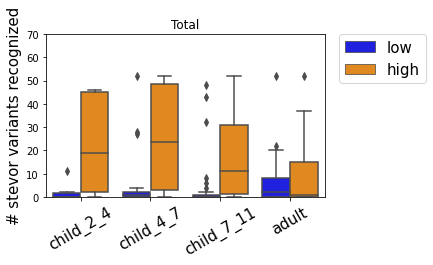

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns 
palette = {'high':'darkorange','low':'blue'}

fig, ax = plt.subplots(figsize=(5,3))

sns.boxplot(x="status", y="C1", data=df_hits_meta_combined , order = ['child_2_4','child_4_7','child_7_11','adult'],  dodge=True,hue= 'eircut',hue_order=['low','high'],ax=ax,palette=palette,
            ).set_title('Total')


#sns.stripplot(x="status", y="C1", data=df_hits_meta_combined , order = ['child_2_4','child_4_7','child_7_11','adult'],  dodge=True,hue= 'eircut',hue_order=['low','high'],ax=ax).set_title('C1 domain')
ax.set_ylim(0,70)
# get legend information from the plot object
handles, labels = ax.get_legend_handles_labels()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=15)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 15,rotation = 30)
#ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 15)
plt.xlabel('')
plt.ylabel('# stevor variants recognized',fontsize = 15)

plt.savefig('Fig_2d_STEVOR_overallbreadth.pdf',dpi=800,bbox_inches='tight')
plt.show()



In [43]:
print (df_hits_meta_combined[(df_hits_meta_combined['status'] =='child_2_4')&(df_hits_meta_combined['eircut'] =='low')]['C1'].median())
print (df_hits_meta_combined[(df_hits_meta_combined['status'] =='child_4_7')&(df_hits_meta_combined['eircut'] =='low')]['C1'].median())
print (df_hits_meta_combined[(df_hits_meta_combined['status'] =='child_7_11')&(df_hits_meta_combined['eircut'] =='low')]['C1'].median())
print (df_hits_meta_combined[(df_hits_meta_combined['status'] =='adult')&(df_hits_meta_combined['eircut'] =='low')]['C1'].median())

print (df_hits_meta_combined[(df_hits_meta_combined['status'] =='child_2_4')&(df_hits_meta_combined['eircut'] =='high')]['C1'].median())
print (df_hits_meta_combined[(df_hits_meta_combined['status'] =='child_4_7')&(df_hits_meta_combined['eircut'] =='high')]['C1'].median())
print (df_hits_meta_combined[(df_hits_meta_combined['status'] =='child_7_11')&(df_hits_meta_combined['eircut'] =='high')]['C1'].median())
print (df_hits_meta_combined[(df_hits_meta_combined['status'] =='adult')&(df_hits_meta_combined['eircut'] =='high')]['C1'].median())


0.0
1.0
0.0
2.0
19.0
23.5
11.0
1.0


In [46]:
a = df_hits_meta_combined[(df_hits_meta_combined['status'] =='child_2_4')&(df_hits_meta_combined['eircut'] =='low')]['C1']
b = df_hits_meta_combined[(df_hits_meta_combined['status'] =='child_4_7')&(df_hits_meta_combined['eircut'] =='low')]['C1']
c =df_hits_meta_combined[(df_hits_meta_combined['status'] =='child_7_11')&(df_hits_meta_combined['eircut'] =='low')]['C1']
d =df_hits_meta_combined[(df_hits_meta_combined['status'] =='adult')&(df_hits_meta_combined['eircut'] =='low')]['C1']

e=df_hits_meta_combined[(df_hits_meta_combined['status'] =='child_2_4')&(df_hits_meta_combined['eircut'] =='high')]['C1']
f=df_hits_meta_combined[(df_hits_meta_combined['status'] =='child_4_7')&(df_hits_meta_combined['eircut'] =='high')]['C1']
g=df_hits_meta_combined[(df_hits_meta_combined['status'] =='child_7_11')&(df_hits_meta_combined['eircut'] =='high')]['C1']
h=df_hits_meta_combined[(df_hits_meta_combined['status'] =='adult')&(df_hits_meta_combined['eircut'] =='high')]['C1']

from scipy import stats 

print (stats.ks_2samp(a,d))
print (stats.ks_2samp(b,d))
print (stats.ks_2samp(c,d))
print (stats.ks_2samp(b,c))

print (stats.ks_2samp(e,h))
print (stats.ks_2samp(f,h))
print (stats.ks_2samp(g,h))
print (stats.ks_2samp(f,g))

KstestResult(statistic=0.26666666666666666, pvalue=0.6264044041932786)
KstestResult(statistic=0.23333333333333334, pvalue=0.39294501397971776)
KstestResult(statistic=0.3, pvalue=0.13500350250095441)
KstestResult(statistic=0.26666666666666666, pvalue=0.23907300248018645)
KstestResult(statistic=0.37547892720306514, pvalue=0.22033616740497797)
KstestResult(statistic=0.46436781609195404, pvalue=0.0014651306808306508)
KstestResult(statistic=0.32068965517241377, pvalue=0.07594816080171707)
KstestResult(statistic=0.26666666666666666, pvalue=0.23907300248018645)
